# Experiment MultiDimensionalityReductionQualityReport

This notebook explore the use of MultiDimensionalityReductionQualityReport class to obtain quality metrics over different dimensionality values.
It applies:
* Dataset: MNIST - first 1000 datapoints from test set
* Dimensionality Reduction technique: UMAP
* Times DimRed technique computed: 10
* Dimensionalities tested: 2, 10, 30

## Basic imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
print(sys.path)
sys.path.append("../../")

2022-10-14 17:23:18.096586: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-14 17:23:18.096605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


['/home/hubert/librep-hiaac/experiments/Experiments_on_metrics', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/hubert/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages']


## Loading the dataset

The dataset is loaded with Keras temporarily because thers is no access to a local mnist dataset. Further versions will use the dataset properly.

In [3]:
from librep.transforms import UMAP
from librep.datasets.multimodal import TransformMultiModalDataset, ArrayMultiModalDataset, WindowedTransform
from librep.metrics.dimred_evaluator import DimensionalityReductionQualityReport, MultiDimensionalityReductionQualityReport
from librep.datasets.har.loaders import MNISTView

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
test_pd_X = np.reshape(x_test, (-1, 28*28))
test_pd_Y = y_test

In [5]:
# Print shapes
data_X_HD = test_pd_X[:1000, :]
data_Y = test_pd_Y[:1000]
print('TEST X SHAPE:', data_X_HD.shape)
print('TEST Y SHAPE:', data_Y.shape)

TEST X SHAPE: (1000, 784)
TEST Y SHAPE: (1000,)


# Reduce with UMAP

In [23]:
reduced_data = [data_X_HD]

dimensions = [2, 10, 30]
times_reduction = 5

for dimension in dimensions:
    for _ in range(times_reduction):
        umap_reducer = UMAP(n_components=dimension)
        reduced_data.append(umap_reducer.fit_transform(data_X_HD))
print([data.shape for data in reduced_data])

[(1000, 784), (1000, 2), (1000, 2), (1000, 2), (1000, 2), (1000, 2), (1000, 10), (1000, 10), (1000, 10), (1000, 10), (1000, 10), (1000, 30), (1000, 30), (1000, 30), (1000, 30), (1000, 30)]


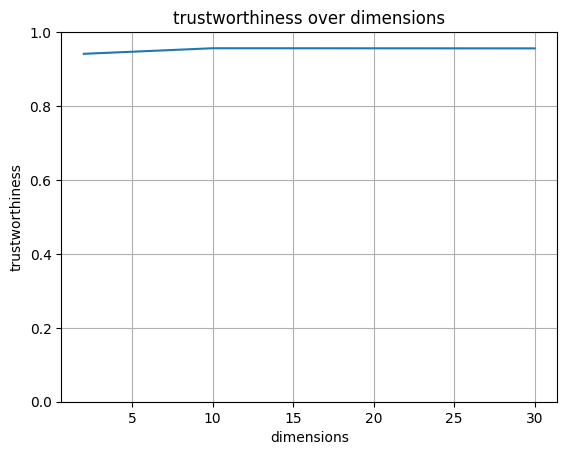

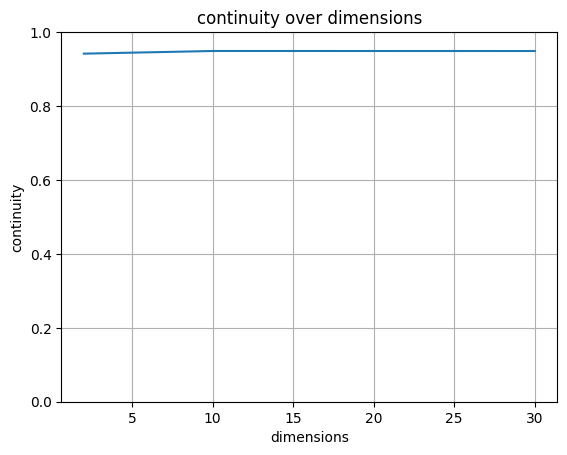

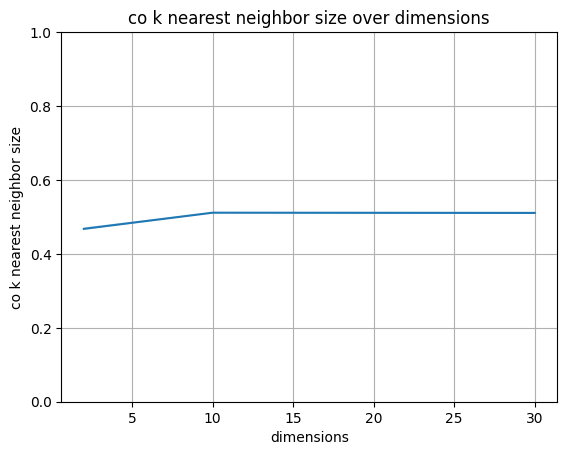

In [37]:
from librep.metrics.dimred_evaluator import MultiDimensionalityReductionQualityReport
metrics_reporter = MultiDimensionalityReductionQualityReport(
    use_residual_variance_pearson = False,
    use_residual_variance_spearman = False,
    use_trustworthiness = True,
    use_continuity = True,
    use_co_k_nearest_neighbor_size = True,
    use_local_continuity_meta_criterion = False,
    use_local_property = False,
    use_global_property = False)
result = metrics_reporter.evaluate(reduced_data)
# print(result)
# assert 1==0

In [17]:
[[data['trustworthiness'] for data in result if data['dim']==dim] for dim in [2, 10]]
# [[for obj in result if ] for dim in [2, 10]]

[[0.9410114590684275, 0.9412948681132811],
 [0.9557732325407808, 0.9564432183964229]]

11
11


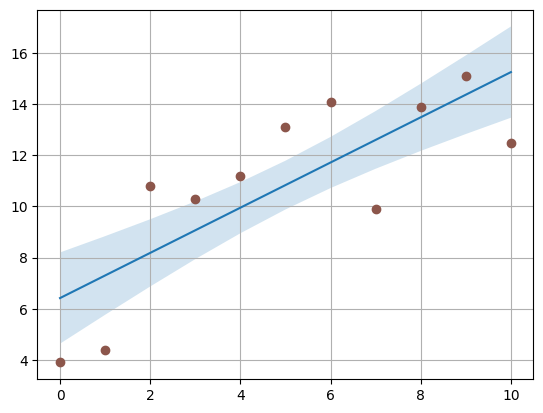

In [33]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
print(len(x))
print(len(y))
# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))


fig, ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')
plt.grid()
